<a href="https://colab.research.google.com/github/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treinamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1) Resumo

Neste notebook foram feitos os treinamentos e seleção de hyperparamentros de 6 modelos de **ML** distintos. Os modelos estudados foram:

* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* Forest Tree
* Support Vector Machine
* KNeighbors

A busca pelos hyperparametros foram feitas pelo GridSearchCV ou pelo RandomizedSearchCV. Para a Cross Validation foi usado **RepeatedStratifiedKFold** com **5** divições de **10** repetições.

O parametro utilizado para avaliação do modelo foi **ROC_AUC** e quantidade de **falsos negativos** (FN).

A base de dados utilizados tem **351** amostras com **52** variaveis explicativas. Dessas **351** amostras **298** foram usados para **Cross Validation** (treino + teste) e **53** foram usados para a **validação**.


---
# 2) Pre-analise

---
## 2.1) Minhas Funções

In [1]:
# Maquina Local 
if (True):
    import sys
    sys.path.insert(1, "../../")

    from src.plota_graficos import plota_curva_roc, plota_matriz_de_confusao
    from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos 

    from src.info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

# Collab
else:
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/requirements.txt"
   !pip3 install -r requirements.txt
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/plota_graficos.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/ml.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/info.py"

   from plota_graficos import plota_curva_roc, plota_matriz_de_confusao
   from ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina, \
                  treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos

   from info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

---
## 2.2) Importando libs

In [2]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform
#
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#


## 2.3) Versão dos bibilotecas

In [3]:
import sklearn as sk
import scipy   as sc
import matplotlib as mpl

print(f'scipy      : {sc.__version__}')
print(f'sklearn    : {sk.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'numpy      : {np.__version__}')
print(f'matplotlib : {mpl.__version__}')

scipy      : 1.6.2
sklearn    : 0.24.2
pandas     : 1.2.4
numpy      : 1.20.2
matplotlib : 3.3.4


---
# 3) Lendo os dados

In [4]:
seed     = 1471523

In [5]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"
path = "../../Dados/Tratados/dados_sem_corr_acima_do_valor_de_corte.csv"
dados = pd.read_csv(path)

dimensao_dados(dados)

dados.tail(n=5)

Numero de linhas : 351 
Numero de colunas: 42 


,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,ICU
346,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,0.142857,0.736842,-0.418803,-1.0,-1.0,-1.0,-1.0,-1.000000,1
347,1,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,-0.059524,0.526316,-0.589744,-1.0,-1.0,-1.0,-1.0,-0.619048,0
348,0,-0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,-0.071429,0.894737,-0.299145,-1.0,-1.0,-1.0,-1.0,-1.000000,1
349,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.661017,-0.107143,0.736842,-0.247863,-1.0,-1.0,-1.0,-1.0,-1.000000,0
350,0,-0.111111,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.525424,0.535714,0.789474,-0.299145,-1.0,-1.0,-1.0,-1.0,-1.000000,0


In [6]:
dados.describe()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,-0.046534,0.381766,0.108262,0.022792,0.091168,0.019943,0.128205,0.045584,0.196581,...,-0.468207,0.097772,0.760029,-0.313074,-0.948718,-0.949522,-0.955764,-0.949053,-0.953398,0.461538
std,0.499002,0.640366,0.486513,0.311155,0.149453,0.288259,0.140004,0.334795,0.208879,0.397980,...,0.213326,0.272230,0.116880,0.185592,0.140561,0.144820,0.138641,0.162552,0.120752,0.499230
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.954802,-0.571429,0.263158,-0.760684,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.593220,-0.107143,0.684211,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,-0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.525424,0.071429,0.789474,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.389831,0.250000,0.842105,-0.213675,-1.000000,-0.987730,-0.984733,-1.000000,-0.976190,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.830508,0.964286,1.000000,0.487179,0.200000,0.411043,0.511450,0.529412,-0.071429,1.000000


In [24]:
dados.var()

AGE_ABOVE65                     0.249003
AGE_PERCENTIL                   0.410068
GENDER                          0.236695
DISEASE GROUPING 1              0.096817
DISEASE GROUPING 2              0.022336
DISEASE GROUPING 3              0.083093
DISEASE GROUPING 4              0.019601
DISEASE GROUPING 5              0.112088
DISEASE GROUPING 6              0.043630
HTN                             0.158388
IMMUNOCOMPROMISED               0.136410
OTHER                           0.153114
ALBUMIN_MEDIAN                  0.021494
BE_VENOUS_MEDIAN                0.016445
BLAST_MEDIAN                    0.011581
FFA_MEDIAN                      0.027523
GGT_MEDIAN                      0.021724
HEMATOCRITE_MEDIAN              0.051190
LACTATE_MEDIAN                  0.701347
LEUKOCYTES_MEDIAN               0.024965
LINFOCITOS_MEDIAN               0.023452
P02_VENOUS_MEDIAN               0.016495
PCR_MEDIAN                      0.058183
PLATELETS_MEDIAN                0.044053
POTASSIUM_MEDIAN

In [8]:
_ = variaveis_explicativas(dados)

 col[  0] -> AGE_ABOVE65                         col[  1] -> AGE_PERCENTIL                       
 col[  2] -> GENDER                              col[  3] -> DISEASE GROUPING 1                  
 col[  4] -> DISEASE GROUPING 2                  col[  5] -> DISEASE GROUPING 3                  
 col[  6] -> DISEASE GROUPING 4                  col[  7] -> DISEASE GROUPING 5                  
 col[  8] -> DISEASE GROUPING 6                  col[  9] -> HTN                                 
 col[ 10] -> IMMUNOCOMPROMISED                   col[ 11] -> OTHER                               
 col[ 12] -> ALBUMIN_MEDIAN                      col[ 13] -> BE_VENOUS_MEDIAN                    
 col[ 14] -> BLAST_MEDIAN                        col[ 15] -> FFA_MEDIAN                          
 col[ 16] -> GGT_MEDIAN                          col[ 17] -> HEMATOCRITE_MEDIAN                  
 col[ 18] -> LACTATE_MEDIAN                      col[ 19] -> LEUKOCYTES_MEDIAN                   
 col[ 20] -> LINFOCI

### Divindido os dados em validação e Cross Valadiation (teste+treino)

In [9]:
rng = RandomState(MT19937(SeedSequence(seed)))
x_cv, x_val, y_cv, y_val = cv_val_split(dados, p_val = .10, rng=rng)

### Verificando se a proporção foi mantida 

In [10]:
proporcao_y(dados['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  52.78%
Campo 1 ->  47.22%
Proporcao do ICU
Campo 0 ->  53.97%
Campo 1 ->  46.03%


In [11]:
numero_teste_treino_val(dados['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 36
Número total de entradas para o Cross Validation : 315


# 4) Modelo de ML

A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV/GridSearchCv **re-treina** esse modelo com o dataset completo (treino+teste). 

In [12]:
n_iter   = 25
n_splits = 5
n_repeats= 10

## 4.1) DummyClassifier

> Aqui será treinado do modelo **DummyClassifier**. Para o treino foi usado **GridSearchCV**. O único hyperparametro disponivel foi **strategy**. O intervalor de busca  **[stratified, 'ost_frequent, prior, 'uniform]**. O DummyClassifier será usado como o nosso modelo **"baseline"**



In [13]:
rng = RandomState(MT19937(SeedSequence(seed)))

modelo = DummyClassifier(random_state=rng)

parameters = {'strategy' : ['stratified', 'most_frequent', 'prior', 'uniform']}

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=n_splits,
                                                                                      n_repeats=n_repeats,
                                                                                      rng=rng)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'stratified'}
Melhor modelo            : DummyClassifier(random_state=RandomState(MT19937) at 0x1E791954640,
                strategy='stratified')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.515659,0.49555,0.074393,0.027633,0.002139,0.001522,0.002538,0.000727,1
1,{'strategy': 'most_frequent'},0.500000,0.50000,0.000000,0.000000,0.001739,0.000716,0.002199,0.000447,2
2,{'strategy': 'prior'},0.500000,0.50000,0.000000,0.000000,0.002059,0.000785,0.002427,0.000663,2
3,{'strategy': 'uniform'},0.500000,0.50000,0.000000,0.000000,0.001679,0.000646,0.002378,0.000629,2


---
## 4.2) Regressão logistica

> Aqui será treinado do modelo **LogisticRegression**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* C             : [0, 4]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


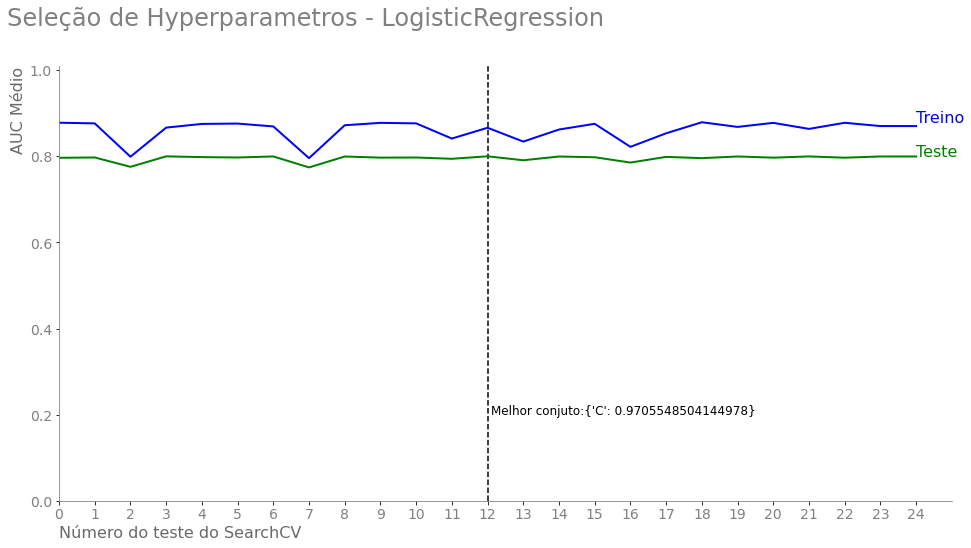

melhores hyperparametros : {'C': 0.9705548504144978}
Melhor modelo            : LogisticRegression(C=0.9705548504144978, max_iter=1000, tol=1e-06)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 3.1503980054311658},0.796613,0.878107,0.046388,0.009999,0.059522,0.009808,0.006116,0.001071,19
1,{'C': 2.6361182255964937},0.797343,0.876519,0.046486,0.010077,0.052818,0.006054,0.006230,0.001218,13
2,{'C': 0.017676648379870485},0.775659,0.799114,0.049849,0.010861,0.014847,0.005251,0.005657,0.000815,24
3,{'C': 0.9980065327467735},0.799959,0.866695,0.048590,0.010296,0.034903,0.003610,0.005900,0.001268,2
4,{'C': 2.2919964239166704},0.798215,0.875308,0.046728,0.010143,0.050258,0.021389,0.005719,0.000903,11
5,{'C': 2.5184487507316655},0.797343,0.876104,0.046833,0.010091,0.048875,0.005242,0.005830,0.000830,14
6,{'C': 1.2743916518112473},0.799757,0.869469,0.047851,0.010254,0.040099,0.005231,0.005439,0.000725,4
7,{'C': 0.011930897600825663},0.774300,0.795819,0.049301,0.011001,0.013780,0.001302,0.005619,0.000774,25
8,{'C': 1.6396579001915375},0.799615,0.872200,0.047422,0.010182,0.041581,0.004792,0.005581,0.000744,8
9,{'C': 3.0397398776997298},0.796998,0.877770,0.046318,0.009995,0.052599,0.006874,0.005638,0.000843,16


In [14]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'C': uniform(loc=0, scale=4)}
modelo = LogisticRegression(max_iter=1000, tol=1e-6)

melhor_modelo_lr, res = treina(modelo = modelo,
                        x = x_cv, 
                        y = y_cv, 
                        parameters = parameters, 
                        n_splits = n_splits, 
                        n_repeats = n_repeats, 
                        n_iter = n_iter, 
                        titulo = 'Seleção de Hyperparametros - LogisticRegression',
                        n = 10,
                        rng=rng)

res

---
## 4.3) Arvore de decissão

> Aqui será treinado do modelo **DecisionTreeClassifier**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros foram:
>* max_depth       : [1-20]
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


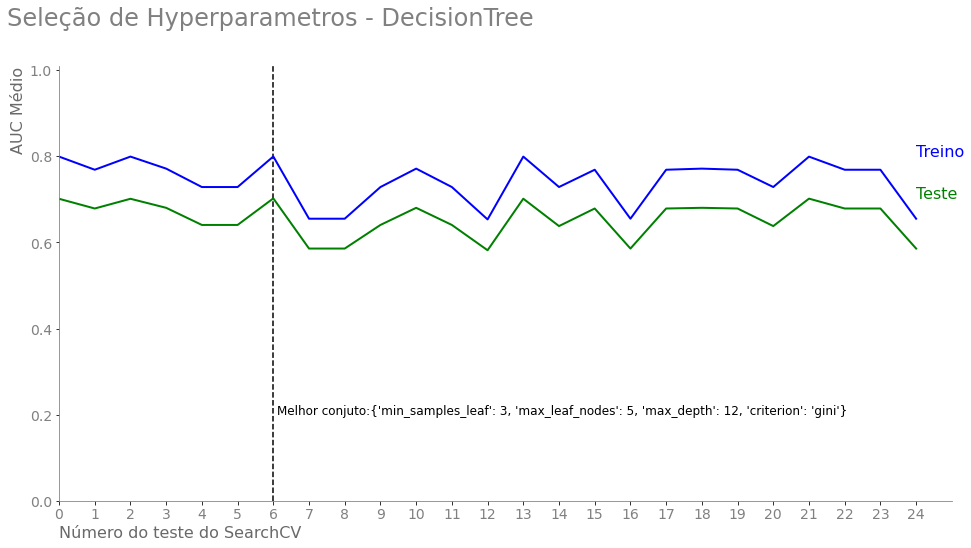

,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'min_samples_leaf': 4, 'max_leaf_nodes': 5, '...",0.701430,0.799414,0.064420,0.016067,0.008534,0.001733,0.005877,0.001088,4
1,"{'min_samples_leaf': 3, 'max_leaf_nodes': 4, '...",0.678864,0.768896,0.052333,0.015289,0.007955,0.000978,0.005997,0.000937,9
2,"{'min_samples_leaf': 3, 'max_leaf_nodes': 5, '...",0.701430,0.799414,0.064420,0.016067,0.009424,0.003290,0.006347,0.001619,4
3,"{'min_samples_leaf': 3, 'max_leaf_nodes': 4, '...",0.680446,0.771469,0.057028,0.012949,0.008175,0.002901,0.007091,0.003225,6
4,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.640659,0.728702,0.047400,0.013296,0.008618,0.001962,0.007076,0.002503,15
5,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.640659,0.728702,0.047400,0.013296,0.008375,0.002212,0.006476,0.001790,15
6,"{'min_samples_leaf': 3, 'max_leaf_nodes': 5, '...",0.702373,0.799660,0.059645,0.015243,0.007124,0.001373,0.006137,0.001296,1
7,"{'min_samples_leaf': 5, 'max_leaf_nodes': 2, '...",0.585852,0.655152,0.041924,0.016325,0.006348,0.000916,0.005817,0.001160,21
8,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.585852,0.655152,0.041924,0.016325,0.006956,0.001885,0.006468,0.002388,21
9,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.640659,0.728702,0.047400,0.013296,0.007655,0.000950,0.005657,0.000839,15


melhores hyperparametros : {'min_samples_leaf': 3, 'max_leaf_nodes': 5, 'max_depth': 12, 'criterion': 'gini'}
Melhor modelo            : DecisionTreeClassifier(max_depth=12, max_leaf_nodes=5, min_samples_leaf=3)


In [15]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = DecisionTreeClassifier()

melhor_modelo_arvore, res = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            titulo = 'Seleção de Hyperparametros - DecisionTree',
                            n = 10,
                            rng=rng)

res

---
## 4.4) Forest Tree

> Aqui será treinado do modelo **Forest Tree**. No treino foi usado **RandomizedSearchCV** com **10** iterações. Os hyperparametros foram:
>* n_estimators    : [10, 50, 100, 150, 200]
>* max_depth       : [1, 20]    
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 25 candidates, totalling 1250 fits


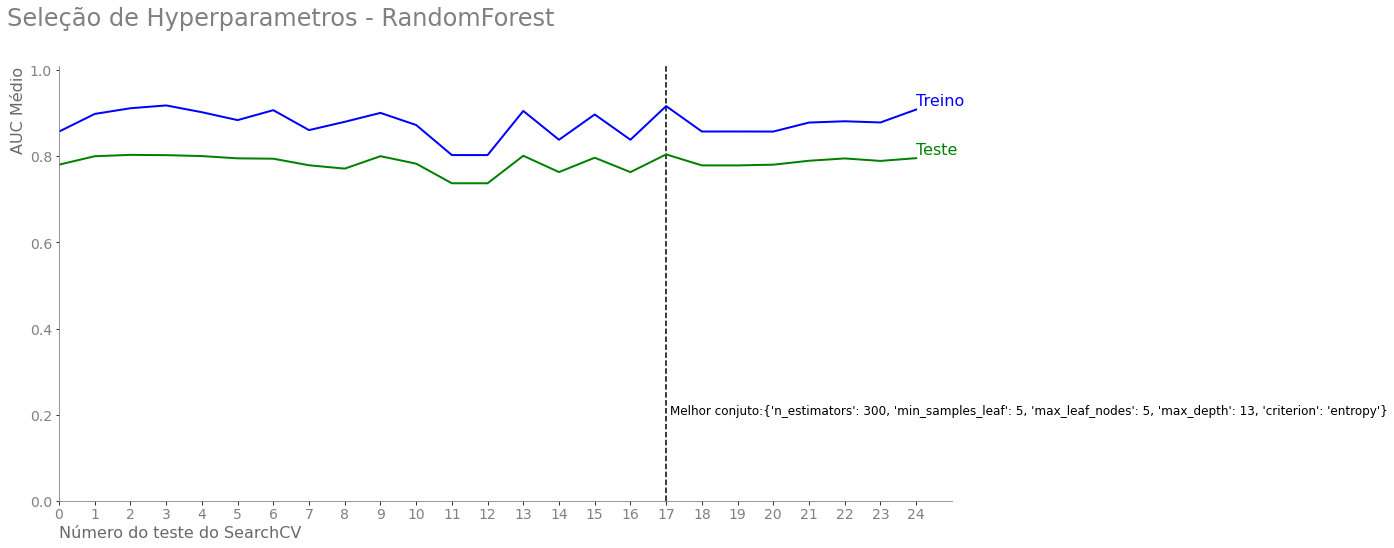

melhores hyperparametros : {'n_estimators': 300, 'min_samples_leaf': 5, 'max_leaf_nodes': 5, 'max_depth': 13, 'criterion': 'entropy'}
Melhor modelo            : RandomForestClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=5,
                       min_samples_leaf=5, n_estimators=300,
                       random_state=RandomState(MT19937) at 0x1E79218AD40)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'n_estimators': 250, 'min_samples_leaf': 4, '...",0.780669,0.857499,0.039002,0.012815,0.689599,0.064340,0.063374,0.020870,16
1,"{'n_estimators': 200, 'min_samples_leaf': 5, '...",0.800264,0.898527,0.039862,0.009226,0.545876,0.038518,0.048426,0.005159,7
2,"{'n_estimators': 150, 'min_samples_leaf': 5, '...",0.803428,0.911710,0.039508,0.008060,0.420439,0.047359,0.039398,0.011964,2
3,"{'n_estimators': 250, 'min_samples_leaf': 1, '...",0.802779,0.918205,0.039564,0.007549,0.741768,0.059229,0.063144,0.017357,3
4,"{'n_estimators': 200, 'min_samples_leaf': 4, '...",0.800609,0.902487,0.039970,0.008974,0.587638,0.047467,0.049571,0.009305,5
5,"{'n_estimators': 300, 'min_samples_leaf': 5, '...",0.795335,0.884139,0.039935,0.010125,0.832619,0.081036,0.071212,0.008654,10
6,"{'n_estimators': 50, 'min_samples_leaf': 2, 'm...",0.794523,0.907203,0.041103,0.009658,0.141423,0.016930,0.017591,0.004484,12
7,"{'n_estimators': 200, 'min_samples_leaf': 5, '...",0.779260,0.860905,0.039329,0.012622,0.540613,0.032914,0.048169,0.004845,18
8,"{'n_estimators': 10, 'min_samples_leaf': 2, 'm...",0.771481,0.880170,0.048845,0.013035,0.032741,0.002468,0.008817,0.001363,21
9,"{'n_estimators': 250, 'min_samples_leaf': 2, '...",0.800345,0.900896,0.040325,0.008800,0.656126,0.024018,0.057114,0.005980,6


In [16]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_estimators'    : [10, 50, 100, 150, 200, 250, 300],
              'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 6),
              'max_leaf_nodes'  : np.arange(2, 6)
             }
modelo = RandomForestClassifier(random_state=rng)

melhor_modelo_forest, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - RandomForest',
                              n = 10,
                              rng=rng)

res

> 

## 4.5) Support Vector Classification.

> Aqui será treinado do modelo **SVC**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* kernel        : [linear, poly, rbf, sigmoid]
>* C             : [0, 2]
>* gamma         : [scale, auto]
>* shrinking     : [True , False]

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


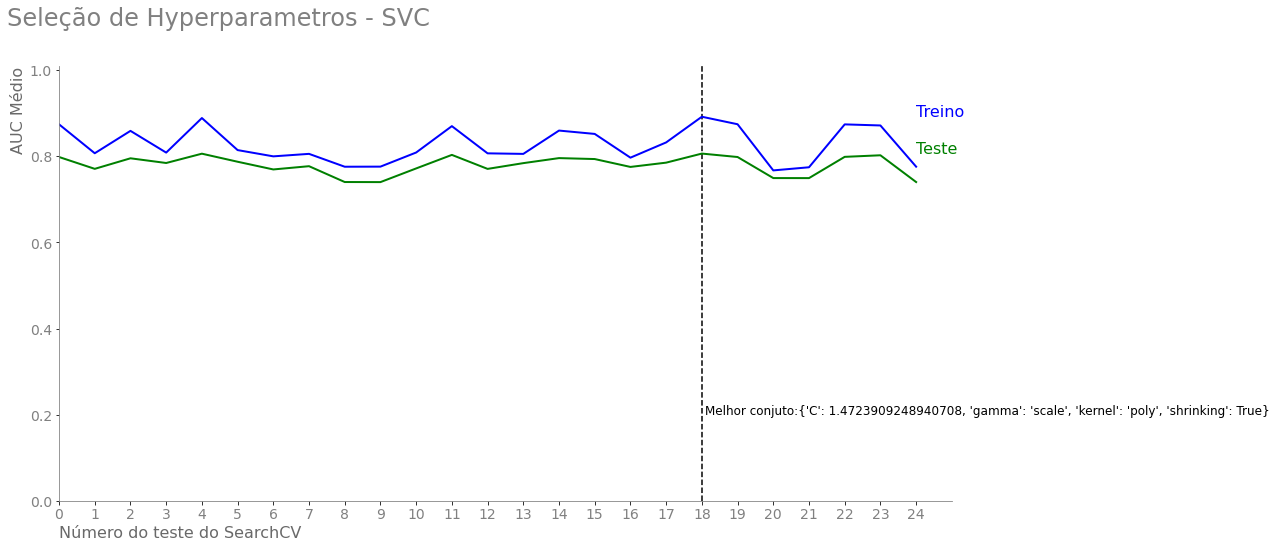

melhores hyperparametros : {'C': 1.4723909248940708, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}
Melhor modelo            : SVC(C=1.4723909248940708, kernel='poly', probability=True)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'C': 1.5751990027155829, 'gamma': 'scale', 'k...",0.798458,0.874353,0.046317,0.010007,0.040540,0.004836,0.006895,0.001220,6
1,"{'C': 1.7921005524620657, 'gamma': 'auto', 'ke...",0.770953,0.807191,0.048166,0.011245,0.036784,0.001784,0.007496,0.001237,18
2,"{'C': 1.2592243753658328, 'gamma': 'scale', 'k...",0.795456,0.859154,0.046143,0.010103,0.046044,0.009960,0.010134,0.004047,9
3,"{'C': 0.9844917418049941, 'gamma': 'auto', 'ke...",0.784544,0.808698,0.045018,0.010306,0.036472,0.003035,0.007898,0.001640,13
4,"{'C': 1.3240373210000769, 'gamma': 'scale', 'k...",0.806166,0.888949,0.047199,0.008828,0.029237,0.002383,0.007167,0.001467,2
5,"{'C': 1.4610068952819986, 'gamma': 'auto', 'ke...",0.787465,0.814523,0.044508,0.010303,0.032900,0.001926,0.007308,0.001226,11
6,"{'C': 1.1816070316934664, 'gamma': 'auto', 'ke...",0.769554,0.799973,0.048514,0.010974,0.038677,0.002870,0.007516,0.001135,20
7,"{'C': 0.4605039796485637, 'gamma': 'auto', 'ke...",0.777120,0.805756,0.045796,0.010840,0.050845,0.010713,0.010354,0.001774,15
8,"{'C': 1.5204021843469244, 'gamma': 'scale', 'k...",0.740345,0.775879,0.052818,0.012817,0.043683,0.008884,0.007867,0.001195,23
9,"{'C': 1.5815954706796762, 'gamma': 'scale', 'k...",0.740162,0.776097,0.052938,0.013023,0.040911,0.001896,0.007394,0.001469,25


In [17]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'kernel'          : ['linear', 'poly', 'rbf', 'sigmoid'],
              'C'               : uniform(loc=0, scale=2),
              'gamma'           : ['scale', 'auto'],
              'shrinking'       : [True, False]
             }

modelo = SVC(probability=True)

melhor_modelo_svc, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - SVC',
                              n = 10,
                              rng=rng)

res

## 4.5) KNeighbors

> Aqui será treinado do modelo **KNeighbor**. No treino foi usado **RandomizedSearchCV** com **50** iterações. Os hyperparametros de busca foram
>* n_neighbors   : [1, 10]
>* p             : [1, 2]
>* weights       : [uniform, distance]
>* algorithm     : [auto, ball_tree, kd_tree, brute]

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


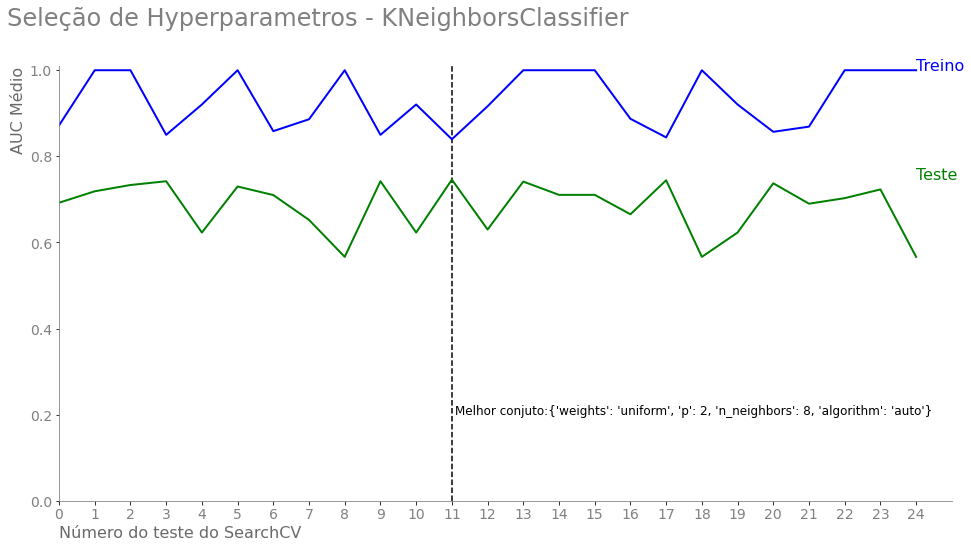

melhores hyperparametros : {'weights': 'uniform', 'p': 2, 'n_neighbors': 8, 'algorithm': 'auto'}
Melhor modelo            : KNeighborsClassifier(n_neighbors=8)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.692262,0.871890,0.059931,0.012437,0.007335,0.004075,0.008926,0.001948,15
1,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.718834,1.000000,0.056604,0.000000,0.006396,0.000824,0.008175,0.001052,10
2,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.733408,1.000000,0.055985,0.000000,0.005437,0.001576,0.008295,0.001512,7
3,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.742160,0.849911,0.053750,0.011579,0.006056,0.002787,0.009774,0.006174,3
4,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.623022,0.920414,0.064103,0.011598,0.005616,0.002124,0.008075,0.002889,20
5,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.729949,1.000000,0.050080,0.000000,0.007755,0.001364,0.009160,0.001368,8
6,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.710091,0.858503,0.058235,0.012737,0.005037,0.000958,0.006916,0.000844,13
7,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.652353,0.886115,0.070032,0.015612,0.006726,0.001073,0.008275,0.001216,18
8,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.566501,1.000000,0.052621,0.000000,0.004957,0.000958,0.007207,0.001009,23
9,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.742160,0.849911,0.053750,0.011579,0.007055,0.001420,0.008854,0.001548,3


In [18]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = {'n_neighbors'     : np.arange(1, 11),
              'p'               : [1, 2],
              'weights'         : ['uniform', 'distance'],
              'algorithm'       : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

modelo = KNeighborsClassifier()

melhor_modelo_kn, res = treina(modelo = modelo,
                              x = x_cv, 
                              y = y_cv, 
                              parameters = parameters, 
                              n_splits = n_splits, 
                              n_repeats = n_repeats, 
                              n_iter = n_iter, 
                              titulo = 'Seleção de Hyperparametros - KNeighborsClassifier',
                              n = 10,
                              rng=rng)

res


# 5) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

In [19]:
modelos = [melhor_modelo_dummy, 
           melhor_modelo_lr, 
           melhor_modelo_arvore, 
           melhor_modelo_forest, 
           melhor_modelo_svc,
           melhor_modelo_kn] 

In [20]:
desempenho_dos_modelos(modelos, x_val, y_val)

,Name,tn,fp,fn,tp,AUC
0,RandomForestClassifier,14,5,6,11,0.780186
1,DecisionTreeClassifier,9,10,2,15,0.736842
2,SVC,12,7,6,11,0.724458
3,KNeighborsClassifier,16,3,10,7,0.695046
4,LogisticRegression,12,7,7,10,0.678019
5,DummyClassifier,11,8,10,7,0.448916


> DataFrame com os resultados

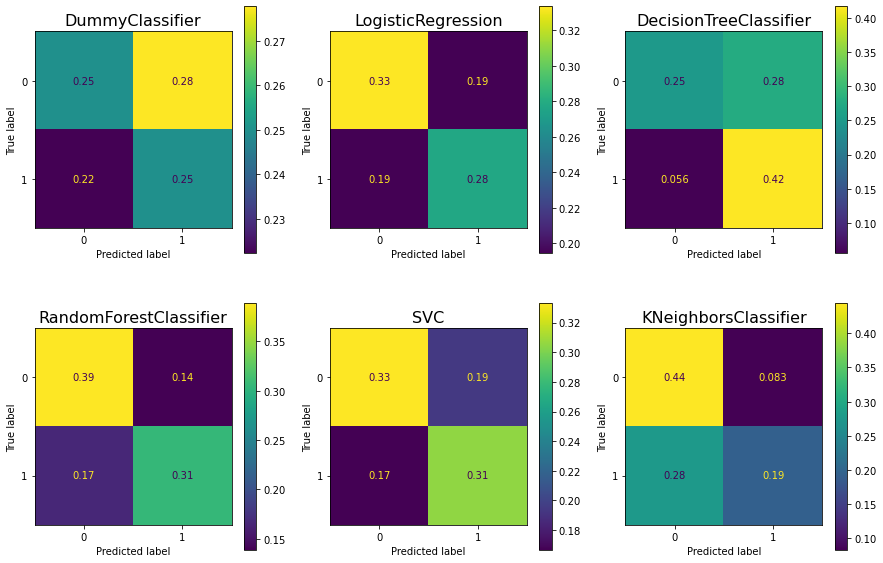

In [21]:
plota_matriz_de_confusao(modelos, x_val, y_val)

> A Matriz de confusão dos modelos. Os paramentro mais crítico para o nosso modelo é o **falso negativo** (FN).

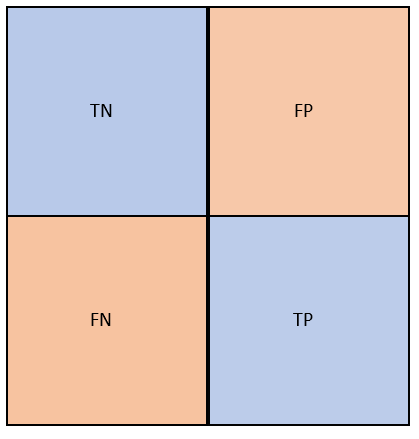

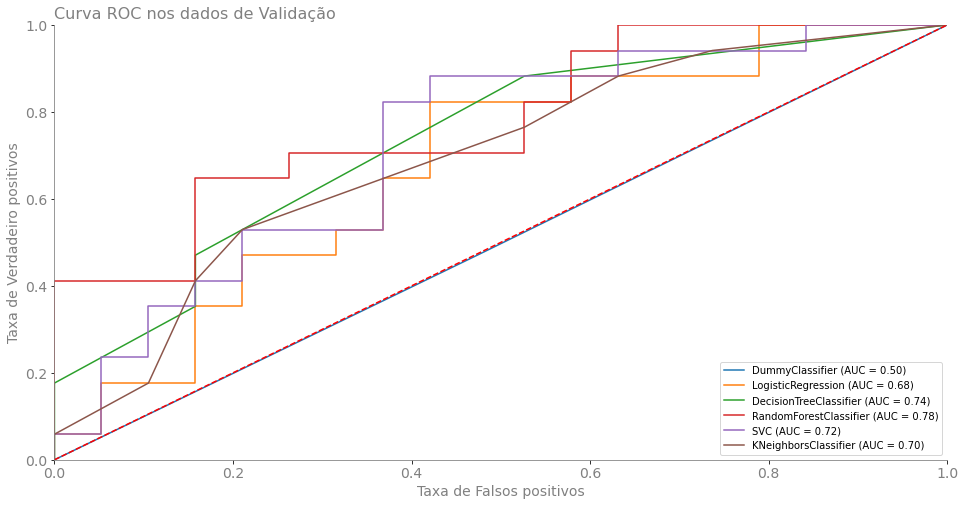

In [22]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Validação', x=x_val, y=y_val)

> A curva ROC dos modelos para os dados de validação. No gráfico observa-se que DummyClassifier estão na diagonal do gráfico como esperado

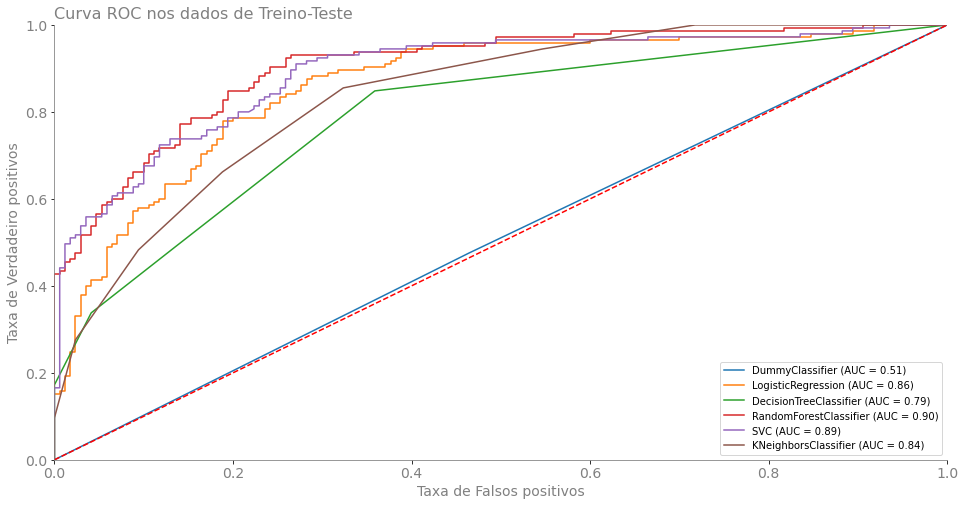

In [23]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Treino-Teste', x=x_cv, y=y_cv)

> A curva ROC dos modelos para os dados usados na **Cross Validation** (teste+treino). Este gráfico não pode ser usado para avaliar o modelo pois o modelo final foi re-treina com todos os dados da **Cross Validation** depois que o melhor hyperparametro foi achado.  

# 6) Conclusão